In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2  # OpenCV for image processing
from scipy.interpolate import splprep, splev  # For cubic spline fitting
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


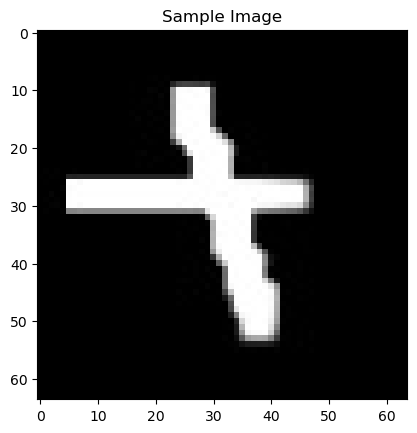

In [7]:
train_dir = r"C:\Users\Aryan Shukla\Downloads\curvetopia\dataset\training_set"
val_dir = r"C:\Users\Aryan Shukla\Downloads\curvetopia\dataset\val"
test_dir = r"C:\Users\Aryan Shukla\Downloads\curvetopia\dataset\test_set"

example_image = cv2.imread(os.path.join(train_dir, 'straightCross\straightCross_42.jpg'))
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))
plt.title("Sample Image")
plt.show()


In [8]:
def preprocess_image(image_path, target_size=(150, 150)):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize pixel values
    return image

# Example for preprocessing all images in a directory
def preprocess_dataset(directory, target_size=(150, 150)):
    images = []
    labels = []
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        label = folder  # Assuming each subfolder is a class label
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            image = preprocess_image(image_path, target_size)
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess the datasets
train_images, train_labels = preprocess_dataset(train_dir)
val_images, val_labels = preprocess_dataset(val_dir)
test_images, test_labels = preprocess_dataset(test_dir)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the augmentation to the training data
datagen.fit(train_images.reshape(-1, 150, 150, 1))


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(np.unique(train_labels)), activation='softmax')  # Use softmax for multiclass classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,679 (40.58 MB)

 Trainable params: 10,636,679 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from sklearn.preprocessing import LabelEncoder


# Assuming your preprocessing code is correct and produces train_images and val_images

# # Label encoding
# le = LabelEncoder()
# train_labels = le.fit_transform(train_labels)
# val_labels = le.transform(val_labels)

# # Reshape images
# train_images = train_images.reshape(-1, 150, 150, 1)
# val_images = val_images.reshape(-1, 150, 150, 1)

# # Ensure labels are arrays
# train_labels = np.array(train_labels)
# val_labels = np.array(val_labels)

# Fit the model
model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=20,  # Adjust the number of epochs
    batch_size=32,
    verbose=1
    
)


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.9989 - loss: 0.0063

ValueError: Invalid dtype: str416

In [22]:
import numpy as np

In [13]:
train_images = train_images.reshape(-1, 150, 150, 1)
val_images = val_images.reshape(-1, 150, 150, 1)

print(train_images.shape)
print(val_images.shape)


(1420, 150, 150, 1)
(4000, 150, 150, 1)


In [14]:
print(train_images.shape[0], train_labels.shape[0])  # Should be equal
print(val_images.shape[0], val_labels.shape[0])  # Should be equal



1420 1420
4000 4000


In [15]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
